## Demonic Blend ##

The goal is to blend two images, keeping the raw features of one while infusing the style of the other.

##### Intuition : #####

The goal is to extract the style of an image.

A first naive way would be to train an image to have the same residual stream as another. While passing an image through a CNN, the activations represent different level of abstractions, different features of an image. The idea is that the residual stream contains the information about the style. However it also contains a lot of information about the position.
This raw information can tell us where to find curves, collor gradients, etc. in the image.
Thus, if we train an image directly on this metric, we will simply end up reconstructing the style image, and we won't extract anything at all.

A more clever way to extract the style is the following.
We will define the style of an image as the correlation between the different features of the image.
To compute it we simply make the matrix of the dot product of the features of the image with themselves. See $objectives.feature\_corelation\_matrix$.
The idea is as follows :

If two features happen to be correlated in the "style" image, we want them to be correlated in the "blended" image as well.
For example, if in the style image, the curve detectors are systematically triggered when there is a line of yellow surrounded by blue,
we want the same to happen in the blended image.
If circles always co occur with color gradient between red and green, we want circles in the blended image to behave the same way.

This way, the position of the features in the original image are preserved
while the relation between those features, color, gradient, sharpness, ... are replaced by the ones of the style image.


Note 1 : Originally, I also included the objective for the image to stay the same. To do so, I used the first method described above as it would preserve the spaciality of features, but it turns out that it is not useful. This is because the correlation matrix completely disregards the position of the features, so they will be naturally preserved.

Note 2 : I tried various ways to get rid of the spatial information, by taking the mean, max or std of each channel.
         The max is as expected a very very bad metric, the mean gives slightyly interesting results but no where near what can be called a style infusion. The std metric is actually verry good and gives verry interesting results, but it is not as powerful as the correlation.


EDIT : this article already did the same thing a few years ago : https://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/Gatys_Image_Style_Transfer_CVPR_2016_paper.pdf

Tries to learn the correlation of the features of the target image.

In Feature Learning, directly transforms the features to have the desired statistics, and learns the immage that fits them.

In [1]:
import torch

import images
import training

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.set_default_tensor_type('torch.cuda.FloatTensor' if torch.cuda.is_available() else 'torch.FloatTensor')

In [2]:
########
# Parameters
########

BIG = True

size = 720 if BIG else (224, 398)

In [3]:
base_image = 'C:\\Users\\ConnardMcGregoire\\Documents\\images\\contents\\OS_FHD.jpg'
style_image = 'C:\\Users\\ConnardMcGregoire\\Documents\\images\\styles\\Hokusai.jpg'

c:\Users\ConnardMcGregoire\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\ConnardMcGregoire\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100%|██████████| 100/100 [00:33<00:00,  2.99it/s]


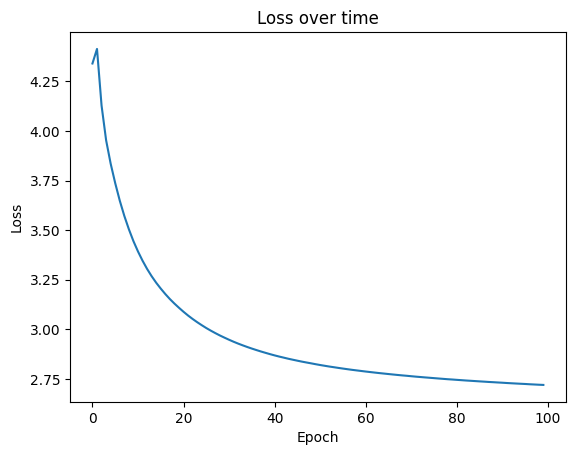

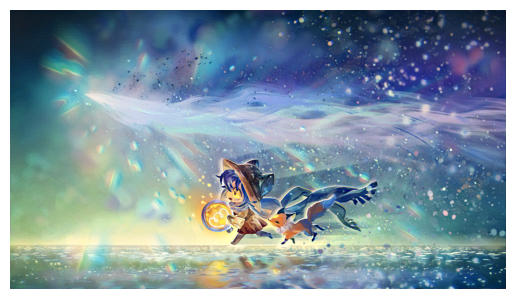

In [4]:
#training.run_correlation(base_image, style_image)
training.run_feature(base_image, style_image)

### A few beautiful results (not so much demonic, but ...) ###

Original images :

In [5]:
im1 = images.ExistingImage("../../images/OS.jpg", resize=size, train=False)().detach()
im2 = images.ExistingImage("../../images/Eva_01.jpg", resize=size, train=False)().detach()
im3 = images.ExistingImage("../../images/kimi_02.jpg", resize=size, train=False)().detach()
im4 = images.ExistingImage("../../images/ori_01.jpg", resize=size, train=False)().detach()
im5 = images.ExistingImage("../../images/sao_09.jpg", resize=size, train=False)().detach()
im6 = images.ExistingImage("../../images/sao_08.jpg", resize=size, train=False)().detach()
im7 = images.ExistingImage("../../images/Eva_07.jpg", resize=size, train=False)().detach()
im8 = images.ExistingImage("../../images/Obama.jpg", resize=size, train=False)().detach()
im9 = images.ExistingImage("../../images/bacon_01.jpg", resize=size, train=False)().detach()


images.imshow([im1, im2, im3, im4])
images.imshow([im5, im6, im7, im8, im9])

FileNotFoundError: [Errno 2] No such file or directory: '../../images/OS.jpg'

Style images :

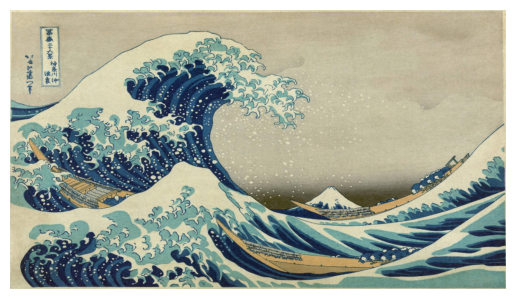

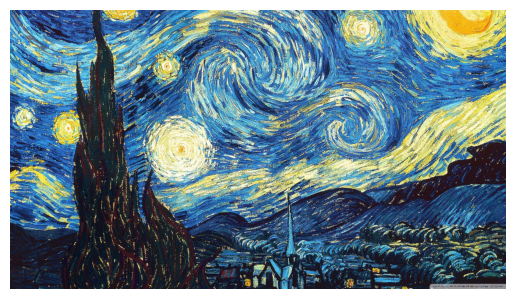

In [ ]:
im1 = images.ExistingImage("../../images/Hokusai_Style.jpg", resize=size, train=False)().detach()
im2 = images.ExistingImage("../../images/VanGogh_Style.jpg", resize=size, train=False)().detach()

images.imshow(im1)
images.imshow(im2)

And the blend versions :

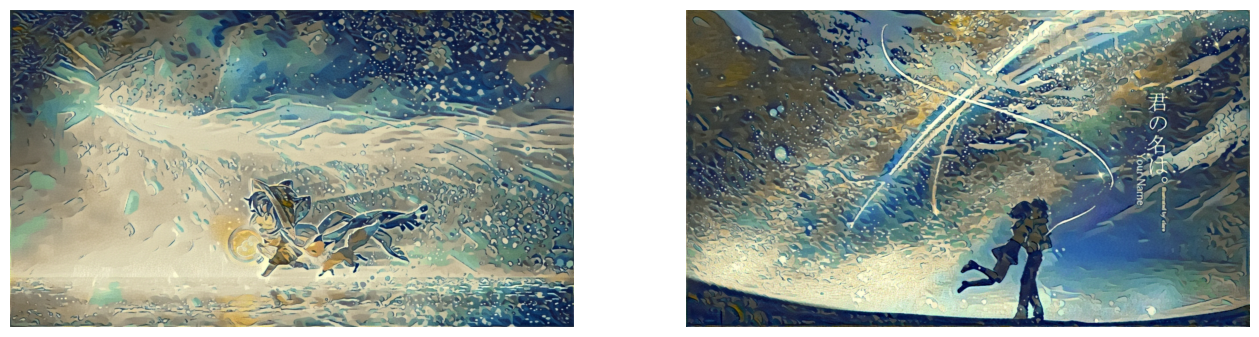

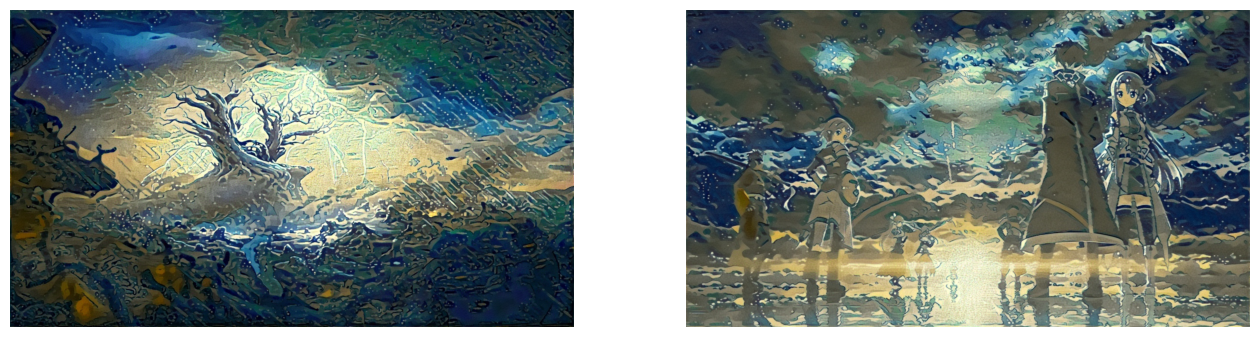

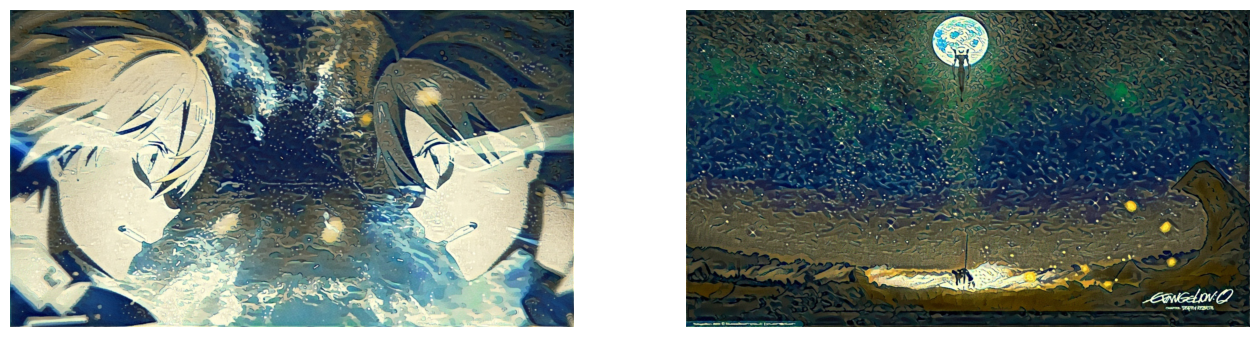

In [ ]:
im1 = images.ExistingImage("../../images/Hokusai_OS.jpg", resize=size, train=False)().detach()
im3 = images.ExistingImage("../../images/Hokusai_kimi_02.jpg", resize=size, train=False)().detach()
im4 = images.ExistingImage("../../images/Hokusai_ori_01.jpg", resize=size, train=False)().detach()
im5 = images.ExistingImage("../../images/Hokusai_sao_09.jpg", resize=size, train=False)().detach()
im6 = images.ExistingImage("../../images/Hokusai_sao_08.jpg", resize=size, train=False)().detach()
im7 = images.ExistingImage("../../images/Hokusai_Eva_07.jpg", resize=size, train=False)().detach()
im8 = images.ExistingImage("../../images/Hokusai_Obama.jpg", resize=size, train=False)().detach()
im9 = images.ExistingImage("../../images/Hokusai_bacon_01.jpg", resize=size, train=False)().detach()


images.imshow([im1, im3], size=2)
images.imshow([im4, im5], size=2)
images.imshow([im6, im7], size=2)
images.imshow([im8, im9], size=2)

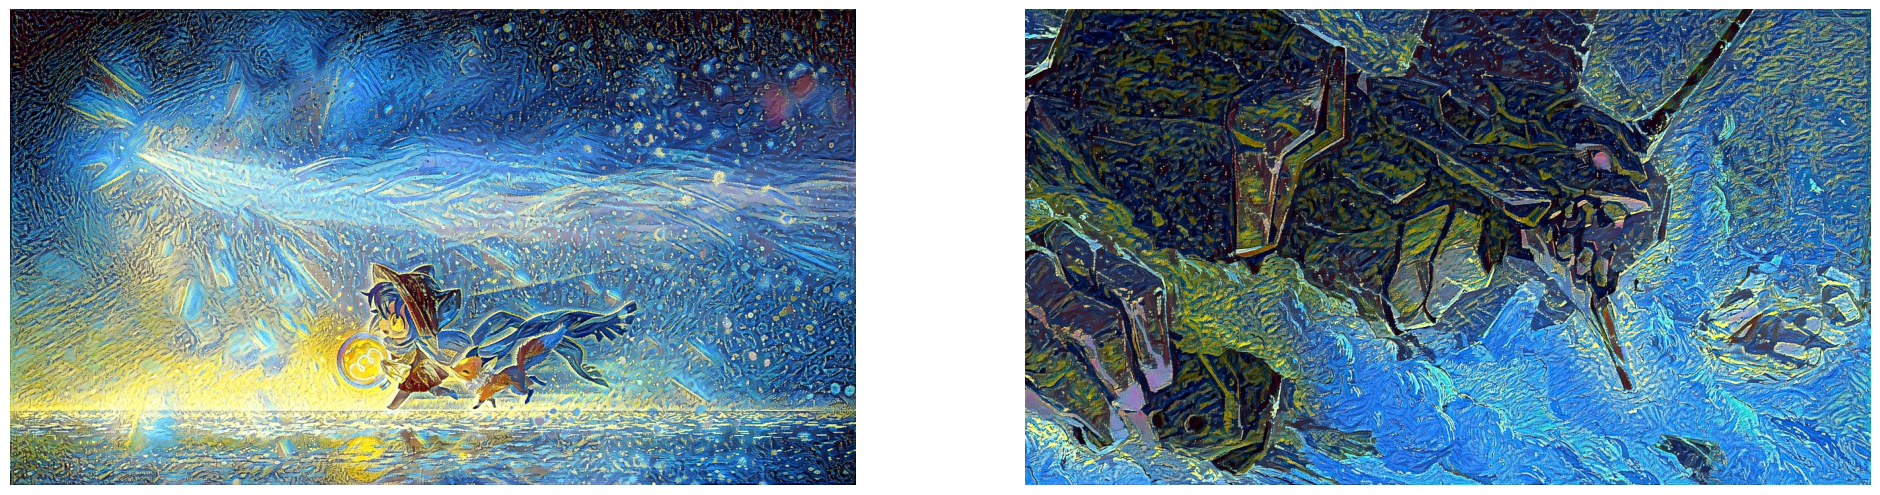

In [ ]:
im1 = images.ExistingImage("../../images/VanGogh_OS.jpg", resize=size, train=False)().detach()
im2 = images.ExistingImage("../../images/VanGogh_Eva_01.jpg", resize=size, train=False)().detach()
im3 = images.ExistingImage("../../images/VanGogh_kimi_02.jpg", resize=size, train=False)().detach()
im4 = images.ExistingImage("../../images/VanGogh_ori_01.jpg", resize=size, train=False)().detach()
im5 = images.ExistingImage("../../images/VanGogh_sao_09.jpg", resize=size, train=False)().detach()
im6 = images.ExistingImage("../../images/VanGogh_sao_08.jpg", resize=size, train=False)().detach()
im7 = images.ExistingImage("../../images/VanGogh_Eva_07.jpg", resize=size, train=False)().detach()
im8 = images.ExistingImage("../../images/VanGogh_Obama.jpg", resize=size, train=False)().detach()

images.imshow([im1, im2], size=3)
images.imshow([im3, im4], size=3)
images.imshow([im5, im6], size=3)
images.imshow([im7, im8], size=3)